FINDING ROOTS OF f(x)=0 UNDER ASSUMPTIONS OF [SINGLE REAL ROOT, f is continuous]

1. Bracketing methods - Start with a interval containing the root (two initial values, lower and upper bound of interval) and successively shrink the interval, till the interval becomes small enough. eg: Bisection method, False-position method
Bracketing methods are guaranteed to get a solution, usually slower but more reliable than open methods.

i. Bisection method - Xm = (Xl+Xr)/2, Next interval decided on sign of f(Xm)f(Xr). 
    Stops when (Xr - Xl < err) or when differences |(Xm_new - Xm_old)/ Xm_new| < rel_err.
    Number of iterations for reaching given precision can be calculated. n = log2(|Xr-Xl|/eps)

ii. False-position method - Xm = (Xl*f(Xr) + Xr*f(Xl))/(f(Xl)+f(Xr))
    Xm is the expected root if function is linear.

Usually, False-position method is faster than bisection method, but not always. 
eg: f(x) = x^10 - 1
In such cases, if one boundary point(say Xr) does not change in 2 iterations in false-position method, we use f(Xr)/2 instead of f(Xr) for finding the value of Xm.

2. Open methods - Start with one initial guess value, and successively get another value which is closer to the true root, till some criteria which determines how close the value is to the true root, becomes true. eg: Newton_Raphson method

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
def f(x):
    return 3.0*x**3 + x - 3

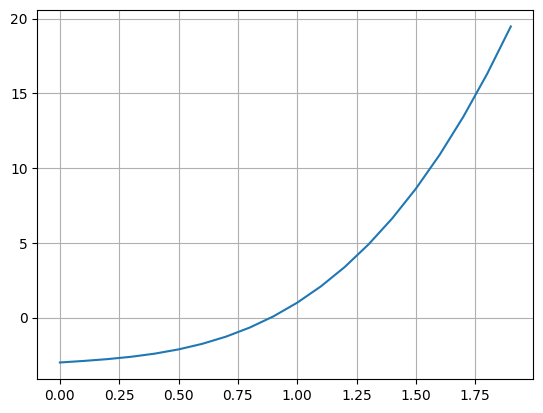

In [9]:
x = np.arange(0,2,0.1)
plt.plot(x,f(x))
plt.grid()
plt.show()

In [10]:
def bisect(xl,xr,eps,imax):
    xm = xr
    x=[];e=[];it=[]
    for i in range(imax):
        xm_old = xm
        xm = (xl+xr)*0.5
        if (xm != 0):
            ea = abs((xm - xm_old)/xm)*100
        it.append(i); x.append(xm); e.append(ea)
        test = f(xl)*f(xm)
        if (test < 0.0):
            xu = xm
        elif (test > 0.0):
            xl = xm
        else:
            ea = 0.0
        if(ea < eps):
            break
    return it, x, e

In [11]:
def falsepos(xl,xr,eps,imax):
    xm = xr
    x=[];e=[];it=[]
    for i in range(imax):
        xm_old = xm
        xm = (xl*f(xr)+xr*f(xl))/(f(xl)+f(xr))
        if (xm != 0):
            ea = abs((xm - xm_old)/xm)*100
        it.append(i); x.append(xm); e.append(ea)
        test = f(xl)*f(xm)
        if (test < 0.0):
            xu = xm
        elif (test > 0.0):
            xl = xm
        else:
            ea = 0.0
        if(ea < eps):
            break
    return it, x, e

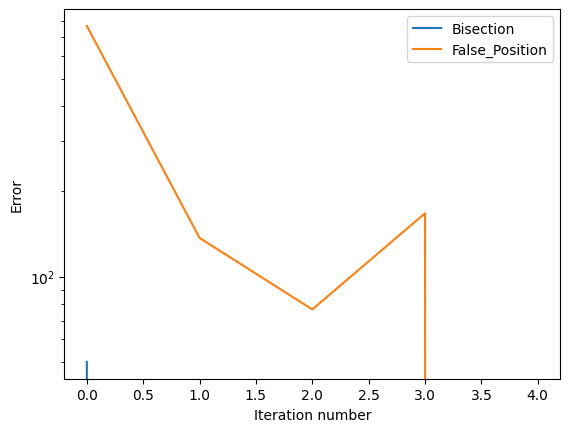

In [12]:
i1,x1,e1 = bisect(0.5,1.5,1e-12,100)
i2,x2,e2 = falsepos(0.5,1.5,1e-12,100)

plt.plot(i1,e1,label="Bisection")
plt.plot(i2,e2,label="False_Position")
plt.legend()
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.yscale('log')